In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Data preparation

In [2]:
csv = pd.read_csv('data/absita_2018_training.csv', sep=';')
assert csv.dropna().shape == csv.shape
print('there are no NAs')

display(csv.head())

there are no NAs


,sentence_id,cleanliness_presence,cleanliness_positive,cleanliness_negative,comfort_presence,comfort_positive,comfort_negative,amenities_presence,amenities_positive,amenities_negative,...,wifi_presence,wifi_positive,wifi_negative,location_presence,location_positive,location_negative,other_presence,other_positive,other_negative,sentence
0,1240343993,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Il rumore di martello e trapano di un operaio ...
1,1240351476,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"Stanza enorme e pulita, con letto comodissimo."
2,1240347600,0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,"Camera spaziosa, letti largho e comodi, colazi..."
3,1240350812,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Gli asciugamani fornitici presentavano dei buchi
4,1240345146,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"L'hotel avrebbe bisogno di una ripulita, non t..."


Load data from preprocessed csv dataframes

In [3]:
df_multilabel = pd.read_csv('data/df_multilabel.csv')
display(df_multilabel)


df_multiclass = pd.read_csv('data/df_multiclass.csv')
# binary classification dataframe
display(df_multiclass)


,sentence,cleanliness_presence,comfort_presence,amenities_presence,staff_presence,value_presence,wifi_presence,location_presence,other_presence
0,Il rumore di martello e trapano di un operaio ...,0,1,0,0,0,0,0,0
1,"Stanza enorme e pulita, con letto comodissimo.",1,1,0,0,0,0,0,0
2,"Camera spaziosa, letti largho e comodi, colazi...",0,1,1,1,0,0,0,0
3,Gli asciugamani fornitici presentavano dei buchi,0,1,0,0,0,0,0,0
4,"L'hotel avrebbe bisogno di una ripulita, non t...",1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6332,"Minibar in camera con bevande gratis, rinnovat...",0,0,1,0,0,0,0,0
6333,La posizione e la facilità di accesso alla tan...,0,0,0,0,0,0,1,0
6334,zona vicino la mergellina e il lungomare,0,0,0,0,0,0,1,0
6335,forse prenotando con largo anticipo le tariffe...,0,0,0,0,1,0,0,0


,sentence,cleanliness,comfort,amenities,staff,value,wifi,location,other
0,Il rumore di martello e trapano di un operaio ...,neutral,negative,neutral,neutral,neutral,neutral,neutral,neutral
1,"Stanza enorme e pulita, con letto comodissimo.",positive,positive,neutral,neutral,neutral,neutral,neutral,neutral
2,"Camera spaziosa, letti largho e comodi, colazi...",neutral,positive,positive,positive,neutral,neutral,neutral,neutral
3,Gli asciugamani fornitici presentavano dei buchi,neutral,negative,neutral,neutral,neutral,neutral,neutral,neutral
4,"L'hotel avrebbe bisogno di una ripulita, non t...",negative,positive,neutral,neutral,neutral,neutral,neutral,neutral
...,...,...,...,...,...,...,...,...,...
6332,"Minibar in camera con bevande gratis, rinnovat...",neutral,neutral,positive,neutral,neutral,neutral,neutral,neutral
6333,La posizione e la facilità di accesso alla tan...,neutral,neutral,neutral,neutral,neutral,neutral,positive,neutral
6334,zona vicino la mergellina e il lungomare,neutral,neutral,neutral,neutral,neutral,neutral,positive,neutral
6335,forse prenotando con largo anticipo le tariffe...,neutral,neutral,neutral,neutral,negative,neutral,neutral,neutral


# Data visualization

Category classes are imbalanced

In [4]:
labels = list(df_multiclass.columns[1:])

Polarity classes are strongly imbalanced

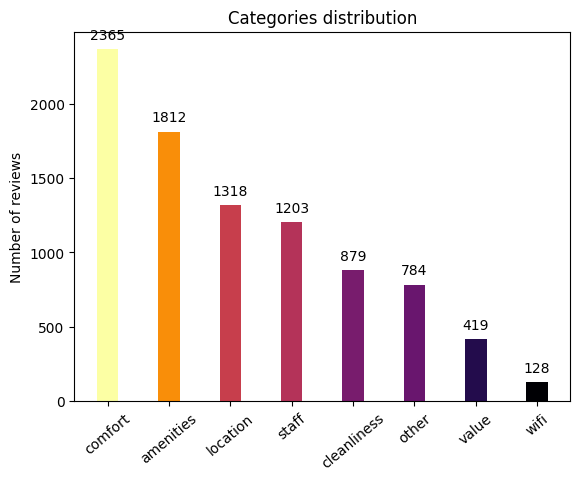

In [5]:
barchart_dict = {}
for col in df_multilabel.columns[1:]:
    barchart_dict.update({col[:-9]: len(df_multilabel[df_multilabel[col] == 1])})

sorted_values = sorted(barchart_dict.values(), reverse= True)
sorted_keys = sorted(barchart_dict, key=barchart_dict.get, reverse=True)
x = np.arange(len(labels)) 
width = 0.35
colors = ('b', 'g', 'r', 'c')
cmap = plt.get_cmap("inferno")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
fig, ax = plt.subplots()
rects1 = ax.bar(x, sorted_values, width,  color=cmap(rescale(sorted_values)))


ax.set_ylabel('Number of reviews')
ax.set_title('Categories distribution')
ax.bar_label(rects1, padding=5)

plt.xticks(x, sorted_keys)
plt.xticks(rotation=40)

plt.show()

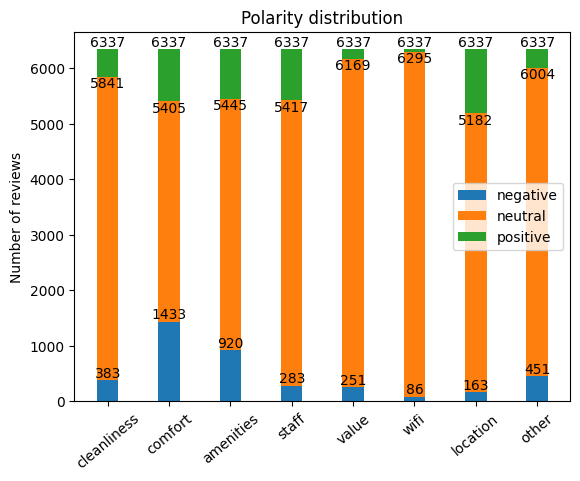

In [6]:
barchart_dict = {}
for col in df_multiclass.columns[1:]:
    barchart_dict.update({col: df_multiclass.groupby(df_multiclass[col]).size().values})

negative = [i[0] for i in barchart_dict.values()]
neutral = [i[1] for i in barchart_dict.values()]
positive = [i[2] for i in barchart_dict.values()]

x = np.arange(len(labels)) 
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x , negative, width, label='negative')
rects2 = ax.bar(x , neutral, width, label='neutral', bottom=negative)
rects3 = ax.bar(x , positive, width, label='positive',bottom=[sum(i) for i in zip(negative, neutral)])

ax.set_ylabel('Number of reviews')
ax.set_title('Polarity distribution')
ax.bar_label(rects1)
ax.bar_label(rects2, padding=-10)
ax.bar_label(rects3)
ax.legend(loc=5)

plt.xticks(rotation=40)
plt.xticks(x,labels)

plt.show()
    



plot distribution for number of categories rated

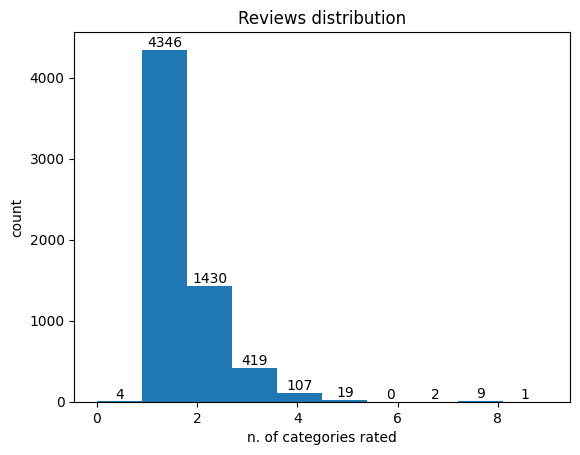

In [15]:
sentiment_columns = [i for i in csv.columns[1:] if i not in df_multilabel.columns]
vals=csv[sentiment_columns].isin([1]).sum(axis=1)
  
fig, ax = plt.subplots(1, 1)
ax.hist(vals)
  
ax.set_title('Reviews distribution')
  
ax.set_xlabel('n. of categories rated')
ax.set_ylabel('count')
  
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, int(height),  ha='center', va='bottom')
plt.show()

following reviews have both positive and negative revews

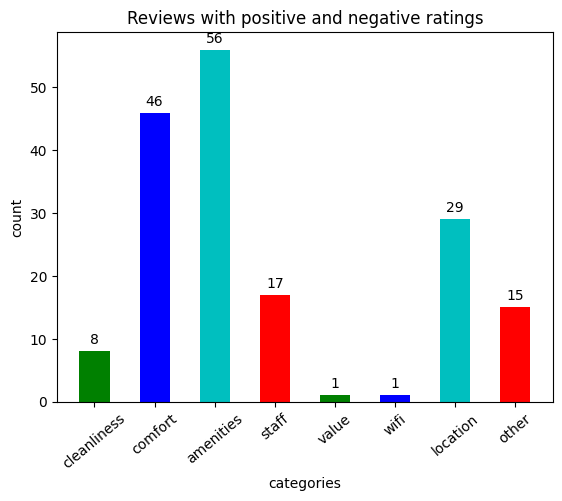

In [8]:
colors = ('b', 'g', 'r', 'c') 

figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
j=0
for i in range(1, csv.columns.size-1, 3):
    val = np.where(csv.iloc[:, i] < csv.iloc[:, i+1]+csv.iloc[:, i+2])[0].size
    rects1 = ax.bar(j, val, align='center', width=0.5, color=colors[i % len(colors)])
    j=j+1
    ax.bar_label(rects1, padding=3)
ax.set_xticks(x, labels)
ax.set_title('Reviews with positive and negative ratings')
  
ax.set_xlabel('categories')
ax.set_ylabel('count')
plt.xticks(rotation=40)

plt.show()
    

longest and shortest reviews

In [9]:
longest_review = csv['sentence'][np.argmax(csv['sentence'].str.count(' ') + 1)]
shortest_review = csv['sentence'][np.argmin(csv['sentence'].str.count(' ') + 1)]

print(longest_review +' - '+str(len(longest_review)))
print('\n')
print(shortest_review +' - '+str(len(shortest_review)))

La mattina dopo avermi svegliato sono andata alla reception per chiedere della colazione... Non ho trovato niente e alla richiesta di due caffè il tizio alla reception molto scorbutico mi ha detto che costava due euro... allora io ho chiesto come mai la colazione non fosse inclusa visto che nella maggior parte dei b e b quando paghi la stanza la colazione è inclusa...  la sua risposta è stata che nel prezzo 5o eur o  la colazione non è compresa... quindi sono andata in camera a prendere i soldi, sono rimandata alla reception e c era la ragazza a cui ho chiesto il caffè, lui da dietro alla reception ha ridetto  due euro per i caffe  io ho detto ho capito e gli ho messo i soldi sul bancone e da lì ha iniziato ad alternarsi e ad insultarmi per il modo in cui gli avevo dato i soldi  Ha anche minacciato Un esperienza da non rifare assplutamente - 851


Elegante - 8


plot word frequencies for positive and negative reviews

In [115]:
# nltk.download('popular')

stop_words = set(stopwords.words('italian'))
stop_words.update(set(('.',',','x','é','molto','po','pò','piu',"c'era",'può')))

def preprocess_text(text_series):
    txt=[]
    for line in text_series:      
        line = line.lower()
        line = word_tokenize(line)
        line = [w for w in line if not w in stop_words]
        txt=txt+line      
    return txt
 
def get_word_frequencies(text_series):
    words_freq = nltk.FreqDist(preprocess_text(text_series))
    words_freq = dict([(m, n) for m, n in words_freq.items() if len(m) > 3])
    
    words_freq = nltk.FreqDist(words_freq)
    return words_freq    

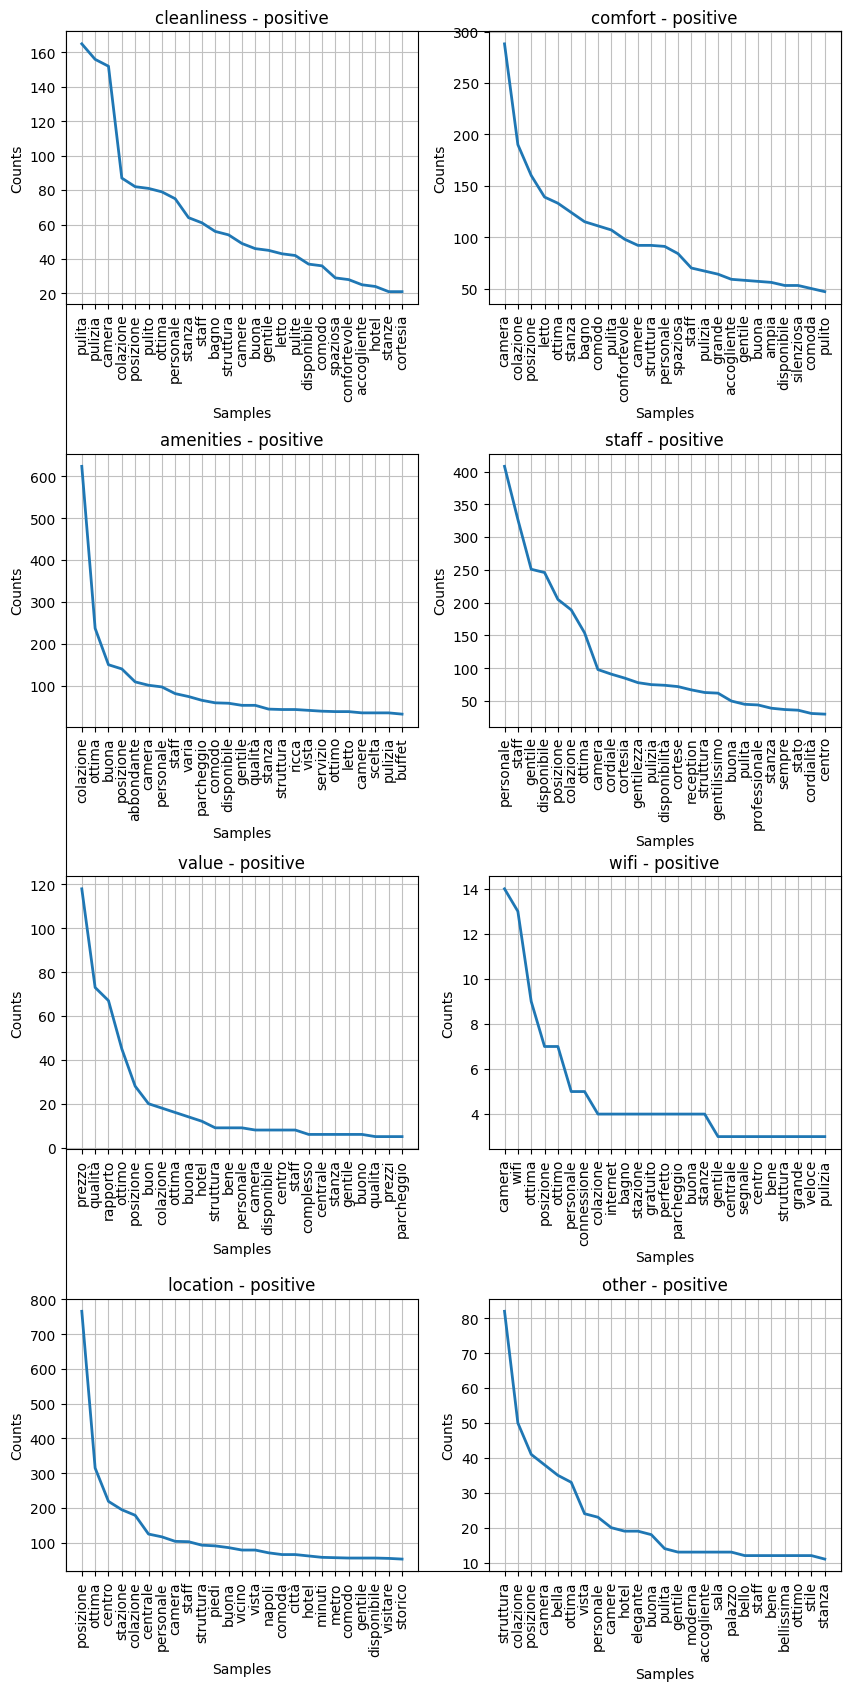

In [279]:
fig, ax = plt.subplots(1, figsize=(10, 20))
plt.xticks([])
plt.yticks([])
for index, cat in enumerate(df_multiclass.columns[1:],1):
    pos= list(df_multiclass.groupby(df_multiclass[cat]))[2][1].index
    fig.add_subplot(4,2,index)
    plt.subplots_adjust(wspace=0.2,hspace=0.55)
    get_word_frequencies(csv.iloc[:,-1][pos]).plot(25,title=str(cat)+str(' - positive'), show=False)

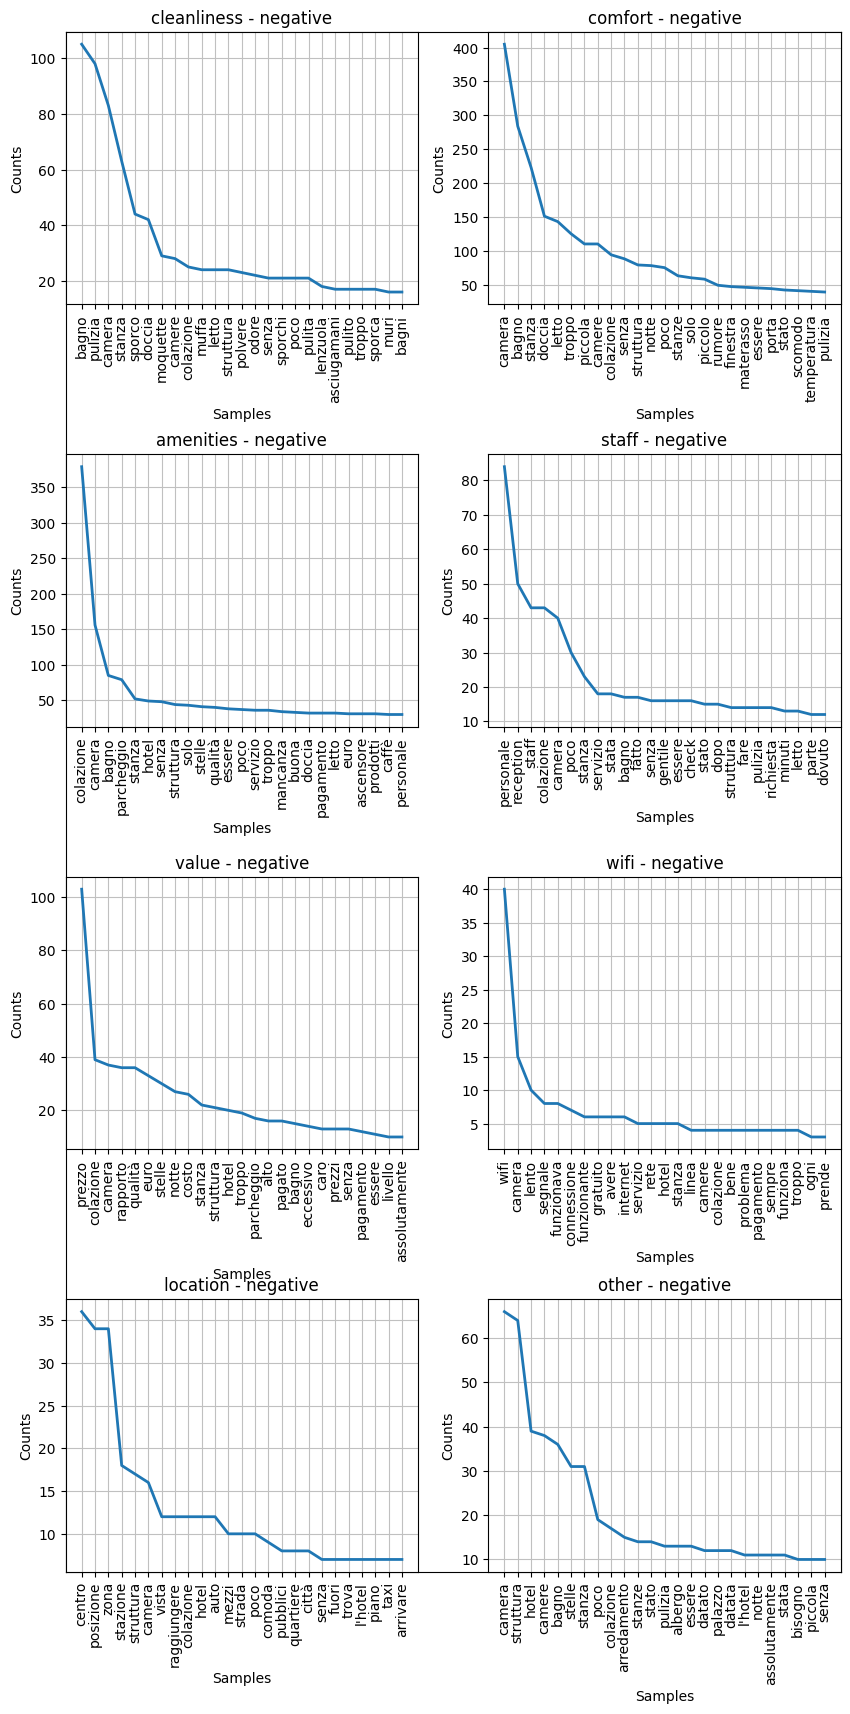

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 20))
plt.xticks([])
plt.yticks([])
for index, cat in enumerate(df_multiclass.columns[1:],1):
    neg= list(df_multiclass.groupby(df_multiclass[cat]))[0][1].index
    fig.add_subplot(4,2,index)
    plt.subplots_adjust(wspace=0.2,hspace=0.55)
    get_word_frequencies(csv.iloc[:,-1][neg]).plot(25,title=str(cat)+str(' - negative'), show=False)

display wordcloud

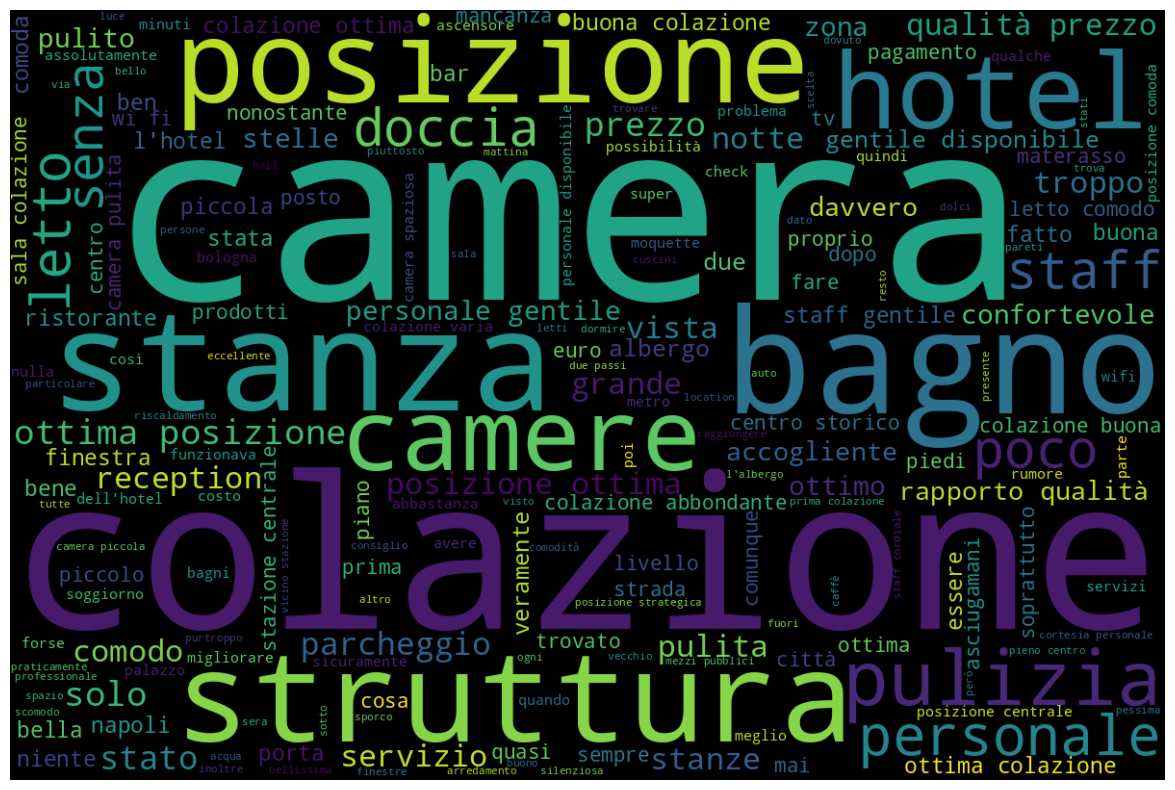

In [90]:
text = ' '.join(preprocess_text(csv['sentence']))
wordcloud = WordCloud(width=1200, height=800).generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()